In [72]:
# Importing the Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [73]:
# Load your Twitter dataset
f = pd.read_csv("Tweets.csv")
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [74]:
df.tail()

,textID,text,selected_text,sentiment
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral


In [75]:
df.shape

(27481, 4)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [87]:
# Drop rows with missing values in the 'text' and 'sentiment' columns
df = df.dropna(subset=['text', 'sentiment'])


In [89]:
# Extract selected text for different sentiments

negative = " ".join(df[df["sentiment"] == "negative"]["selected_text"])
positive = " ".join(df[df["sentiment"] == "positive"]["selected_text"])
neutral = " ".join(str(text) for text in df[df["sentiment"] == "neutral"]["selected_text"].fillna(''))


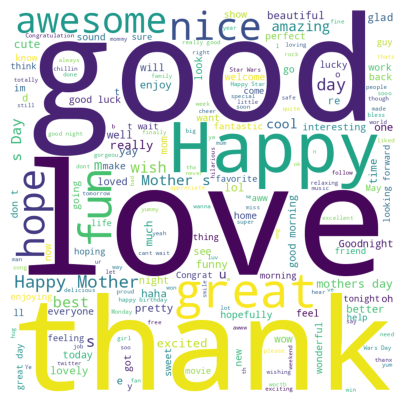

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with specified settings
wc = WordCloud(width=800, height=800,
               background_color='white',  # Background color of the word cloud
               min_font_size=10)  # Minimum font size for words

# Generate the word cloud using the 'positive' text data
wc.generate(positive)

# Create a matplotlib figure for displaying the word cloud
plt.figure(figsize=(7, 5))  # Set the figure size
plt.imshow(wc)  # Display the word cloud image
plt.axis("off")  # Turn off the axis display
plt.show()  # Show the word cloud visualization


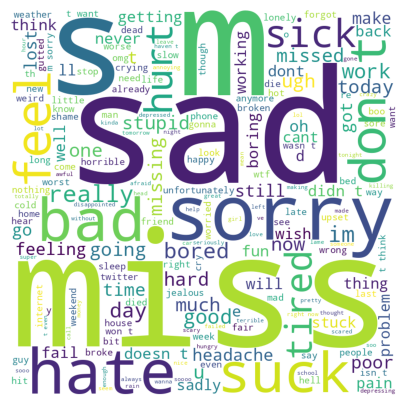

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with specified settings
wc = WordCloud(width=800, height=800,
               background_color='white',  # Background color of the word cloud
               min_font_size=10)  # Minimum font size for words

# Generate the word cloud using the 'negative' text data
wc.generate(negative)

# Create a matplotlib figure for displaying the word cloud
plt.figure(figsize=(7, 5))  # Set the figure size
plt.imshow(wc)  # Display the word cloud image
plt.axis("off")  # Turn off the axis display
plt.show()  # Show the word cloud visualization


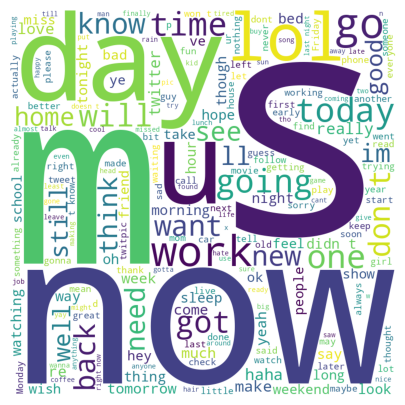

In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with specified settings
wc = WordCloud(width=800, height=800,
               background_color='white',  # Background color of the word cloud
               min_font_size=10)  # Minimum font size for words

# Generate the word cloud using the 'neutral' text data
wc.generate(neutral)

# Create a matplotlib figure for displaying the word cloud
plt.figure(figsize=(7, 5))  # Set the figure size
plt.imshow(wc)  # Display the word cloud image
plt.axis("off")  # Turn off the axis display
plt.show()  # Show the word cloud visualization


In [115]:
# Split data into features (text) and target (sentiment)
x = df['text']
y = df['sentiment']

In [94]:
# Split the data into training and testing sets
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [116]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000)  # Initialize TF-IDF vectorizer with max 10000 features
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform training text data
X_test_tfidf = vectorizer.transform(X_test)  # Transform testing text data using the same vectorizer

In [117]:
# Train a Naive Bayes classifier
classifier = MultinomialNB()  # Initialize a Multinomial Naive Bayes classifier
classifier.fit(X_train_tfidf, y_train)  # Train the classifier using TF-IDF transformed training data and target labels


MultinomialNB()

In [118]:
# Predictions
y_pred = classifier.predict(X_test_tfidf)  # Predict sentiments on the testing data using the trained classifier

In [119]:
# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.621057738961669


In [120]:
# Generate classification report
report = classification_report(ytest, ypred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.41      0.54      2329
     neutral       0.53      0.82      0.65      3319
    positive       0.77      0.55      0.64      2596

    accuracy                           0.62      8244
   macro avg       0.69      0.60      0.61      8244
weighted avg       0.67      0.62      0.61      8244



In [121]:
# New tweets for prediction
tweets1="I`d have responded, if I were going"
tweets2="Sooo SAD"
tweets3="Wow... u just became cooler."

In [123]:
# Predict sentiments for new tweets
new_tweets_tfidf = vectorizer.transform([tweets1, tweets2, tweets3]) # Transform new tweets using the same vectorizer
new_tweets_pred = classifier.predict(new_tweets_tfidf) # Predict sentiments for new tweets



In [124]:
# Display predicted sentiments for new tweets
for tweet, sentiment in zip([tweets1, tweets2, tweets3], new_tweets_pred):
    print(f"Tweet: '{tweet}'")
    print(f"Predicted Sentiment: {'Positive' if sentiment == 'positive' else 'Negative'}")
    print("=" * 40)

Tweet: 'I`d have responded, if I were going'
Predicted Sentiment: Negative
Tweet: 'Sooo SAD'
Predicted Sentiment: Negative
Tweet: 'Wow... u just became cooler.'
Predicted Sentiment: Positive
